In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("zomato.csv")
#data.sample(3)
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
print(data.isnull().sum())

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64


In [4]:
data = data.drop(['url','phone','reviews_list','dish_liked','menu_item','listed_in(city)'],axis=1)

In [5]:
data.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [6]:
df = data.dropna().reset_index(drop=True)

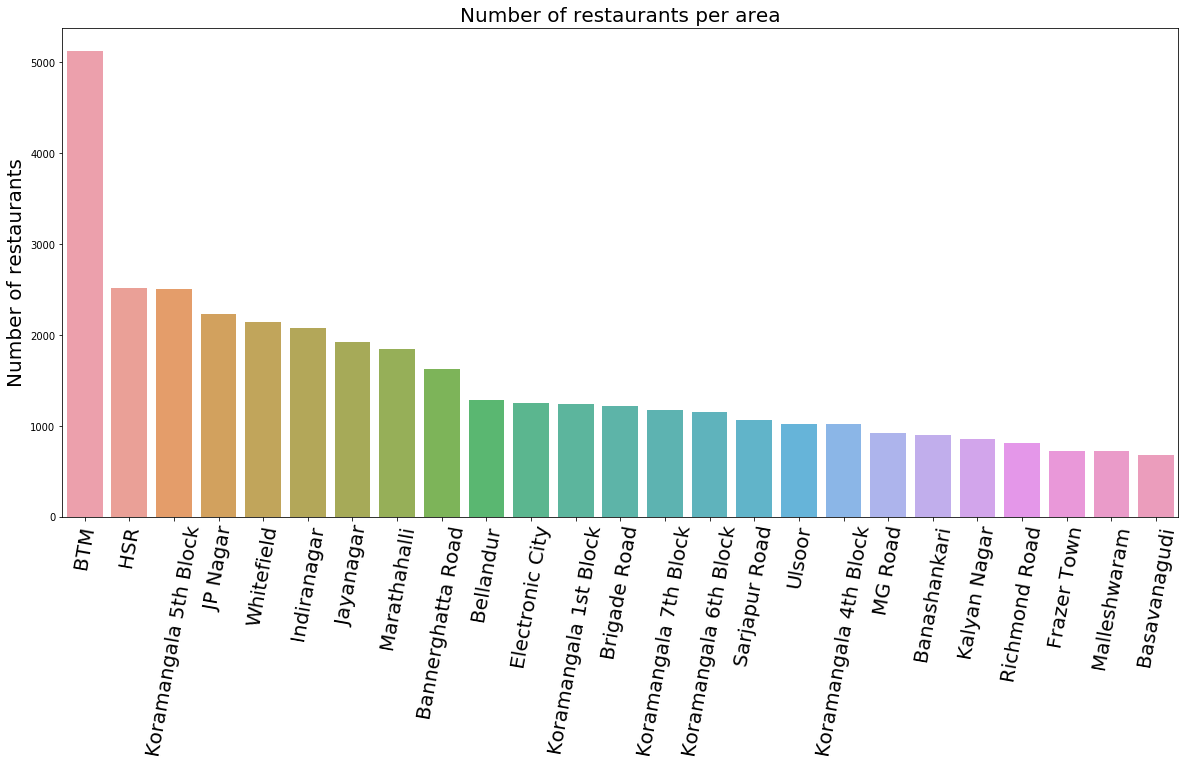

In [7]:
location_count  = data['location'].value_counts()
location_count = location_count[:25,]
plt.figure(figsize=(20,9))
sns.barplot(location_count.index, location_count.values, alpha=0.9)
plt.xticks(rotation=80,fontsize=20)
plt.title('Number of restaurants per area',fontsize=20)
plt.ylabel('Number of restaurants', fontsize=20)
plt.xlabel('', )
plt.show()

In [8]:
print("The Most reviewed food chains \n")
print(data['name'].value_counts()[:10])

The Most reviewed food chains 

Cafe Coffee Day      96
Onesta               85
Just Bake            73
Empire Restaurant    71
Five Star Chicken    70
Kanti Sweets         68
Petoo                66
Polar Bear           65
Baskin Robbins       64
Pizza Hut            62
Name: name, dtype: int64


In [9]:
data_cost = data[data['approx_cost(for two people)'].notnull()]
cost_for_two = [re.sub("[^0-9]", "", str(i)) for i in data_cost['approx_cost(for two people)']]
cost_for_two = filter(None, cost_for_two)
cost_for_two = [int(i) for i in cost_for_two]
data_cost['cost_for_two'] = cost_for_two
data_cost = data_cost[['location','cost_for_two']]
print("Average cost of meal for 2 is:",sum(cost_for_two)/len(cost_for_two)/2)

Average cost of meal for 2 is: 277.71578322399796


In [10]:
df = df.drop_duplicates(subset='name', keep="last")
df['rate'] = df['rate'].replace({'NEW': '0/5','-':'0/5'})
df['rating'] = [float(i.split('/')[0]) for i in df['rate']]
df['rating*votes'] = df['rating'] * df['votes']

In [11]:
df.sort_values('rating*votes',ascending=False)[['name','location','rating','rating*votes']].head(10).reset_index(drop=True)

,name,location,rating,rating*votes
0,Byg Brewski Brewing Company,Sarjapur Road,4.9,82476.8
1,Toit,Indiranagar,4.7,70293.2
2,Big Pitcher,Old Airport Road,4.6,42780.0
3,Arbor Brewing Company,Brigade Road,4.5,37885.5
4,Prost Brew Pub,Koramangala 4th Block,4.5,35419.5
5,The Black Pearl,Marathahalli,4.8,34963.2
6,Biergarten,Whitefield,4.7,33200.8
7,The Hole in the Wall Cafe,Koramangala 4th Block,4.6,32830.2
8,Church Street Social,Church Street,4.3,32611.2
9,TBC Sky Lounge,HSR,4.7,31701.5


In [13]:
df = data.dropna().reset_index(drop=True)
df['rate'] = df['rate'].replace({'NEW': '0/5','-':'0/5'})
df['rating'] = [float(i.split('/')[0]) for i in df['rate']]
cost_for_two = [re.sub("[^0-9]", "", str(i)) for i in df['approx_cost(for two people)']]
cost_for_two = filter(None, cost_for_two)
cost_for_two = [int(i) for i in cost_for_two]
df['cost_for_two'] = cost_for_two
data_needed = df[['name','online_order','location','cuisines','cost_for_two','rating']]


def may_i_suggest(location,cuisine,cost_for_two):
    try:
        order_from = df[(df['cuisines'].str.match(cuisine)) & (data_needed['location']==location) &
           (data_needed['cost_for_two'] <= cost_for_two)].sort_values('rating',ascending=False)[['name','address']].drop_duplicates().reset_index(drop=True)
        print("BEST PLACES TO ORDER FROM: \n")

        for i in range(0,5):
            print(i+1,'.',order_from['name'][i],'- Addr:',order_from['address'][i],"\n")
    except:
        print("NOT ABLE TO FIND ONE, I SUGGEST GOING OUTSIDE IT IS A WONDERFUL DAY AFTER ALL !")

In [17]:
may_i_suggest('Bellandur','Pizza',800) 

BEST PLACES TO ORDER FROM: 

1 . Mojo Pizza - 2X Toppings - Addr: 158, Srivaru Towers, Greenglen Layout, Bellandur, Bangalore 

2 . Domino's Pizza - Addr: 78/5, Sri Gowrikshna Arcade, Behind Central Mall, M.H. Colony, Bellandur, Bangalore 

3 . Pizza Hut - Addr: Ground Floor, Bangalore Central, Bellandur, Bangalore 

4 . Domino's Pizza - Addr: 102, 1st Floor, The Bay, RMZ Ecospace, Varthur Hobli, Bellandur, Bangalore 

5 . Gusto's Pizza - Addr: #72/1, GVR Plaza, Opposite Central Mall, Bellandur Outer Ring Road, Bellandur, Bangalore 



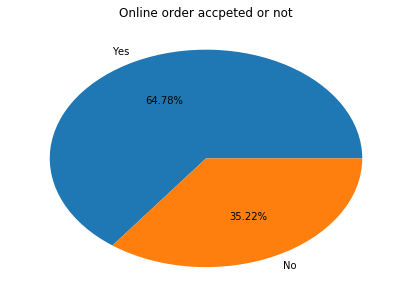

In [18]:
onlineOrder=df['online_order'].value_counts().reset_index()
plt.figure(figsize=(7,5))
plt.pie(onlineOrder["online_order"],labels=onlineOrder['index'],autopct="%.2f%%")
plt.title('Online order accpeted or not')
plt.show()

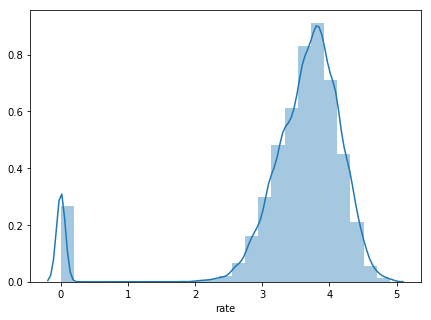

In [19]:
rate=df['rate'].dropna()
rate=rate[~rate.str.contains(r'[NEW-]')]

rate=rate.apply(lambda x: float(x.replace('/5','')))

plt.figure(figsize=(7,5))
sns.distplot(rate,bins=25)